In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv('/kaggle/input/udemy-courses/udemy_courses.csv')

In [127]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Date,Time
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017-01-18,20:58:58
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017-03-09,16:34:20
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016-12-19,19:26:30
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017-05-30,20:07:24
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016-12-13,14:57:18


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [91]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [92]:
df_numeric = df.select_dtypes(include='number')
df1=df_numeric.corr()

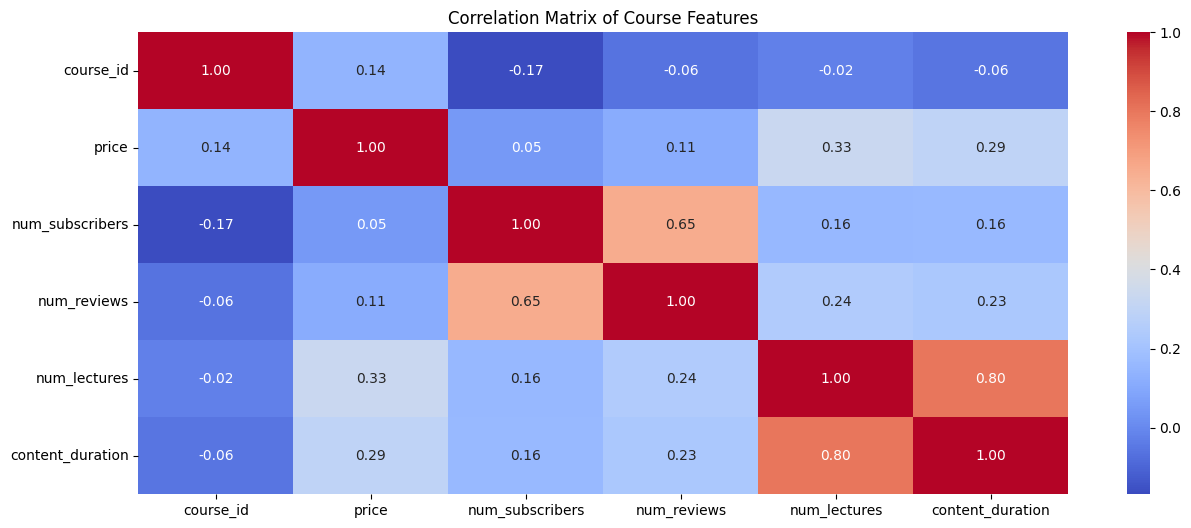

In [93]:
plt.figure(figsize=(15,6))

sns.heatmap(df1,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix of Course Features")
plt.show()

In [94]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df.duplicated().sum()

0

In [97]:
df['published_timestamp']=pd.to_datetime(df['published_timestamp'],errors='coerce')

In [98]:
df['Date']=pd.DatetimeIndex(df['published_timestamp']).date

In [99]:
df['Time']=pd.DatetimeIndex(df['published_timestamp']).time

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3672 non-null   int64              
 1   course_title         3672 non-null   object             
 2   url                  3672 non-null   object             
 3   is_paid              3672 non-null   bool               
 4   price                3672 non-null   int64              
 5   num_subscribers      3672 non-null   int64              
 6   num_reviews          3672 non-null   int64              
 7   num_lectures         3672 non-null   int64              
 8   level                3672 non-null   object             
 9   content_duration     3672 non-null   float64            
 10  published_timestamp  3672 non-null   datetime64[ns, UTC]
 11  subject              3672 non-null   object             
 12  Date                 3672

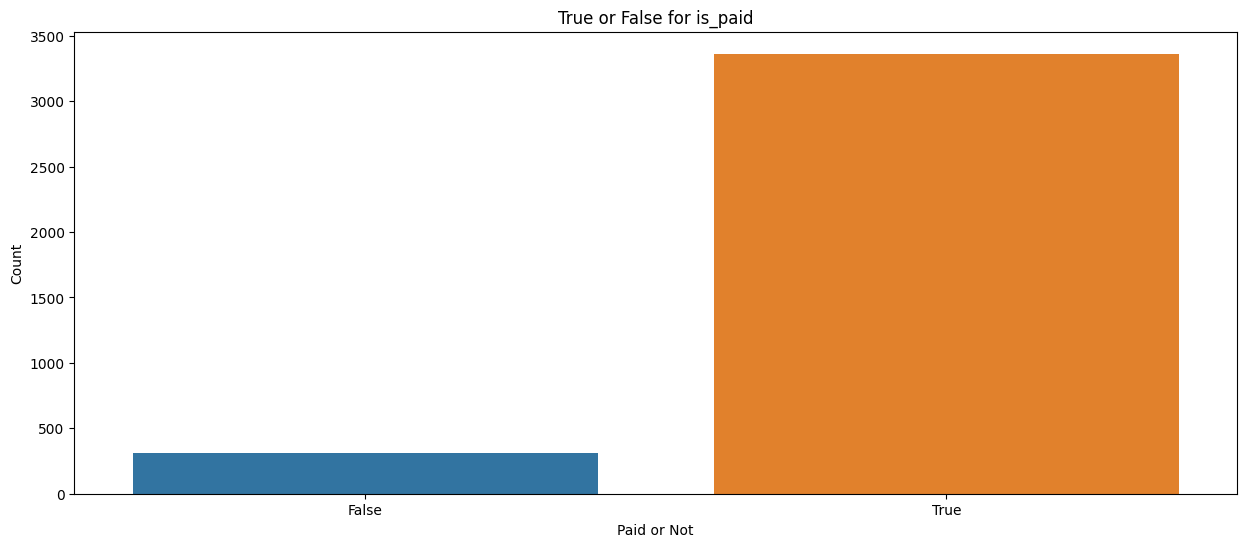

In [111]:
plt.figure(figsize=(15,6))
sns.countplot(x='is_paid',data=df)
plt.title('True or False for is_paid')
plt.ylabel('Count')
plt.xlabel('Paid or Not')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/usr/local/lib/python3.11/dist-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
/usr/loca

<Figure size 2000x1000 with 0 Axes>

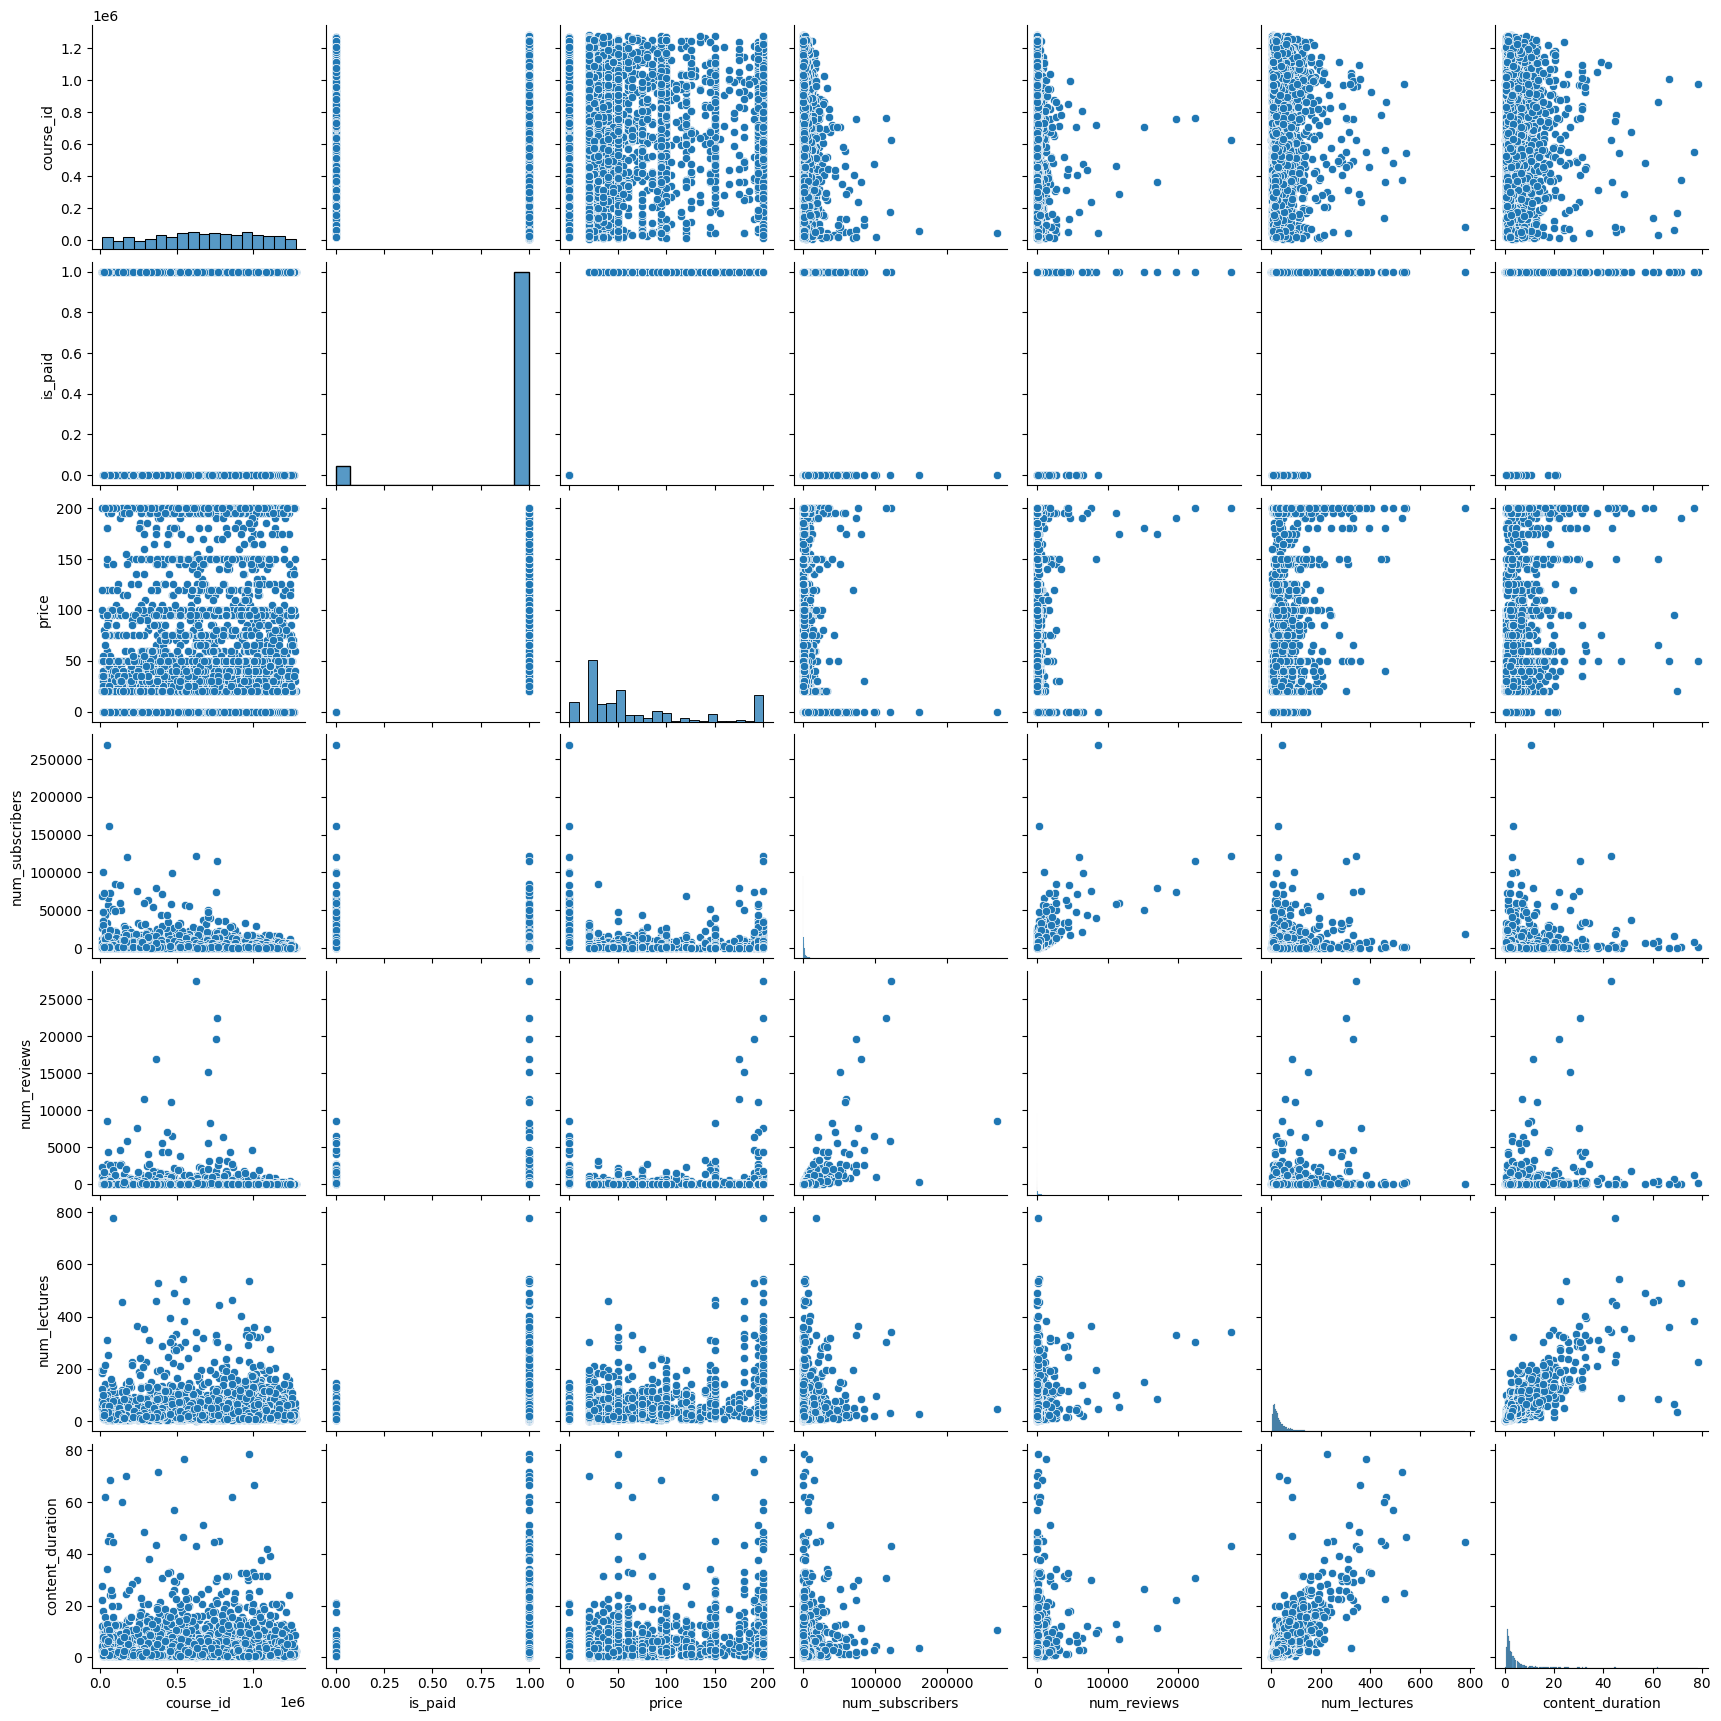

In [115]:
plt.figure(figsize=(20,10))
sns.pairplot(df)
plt.show()

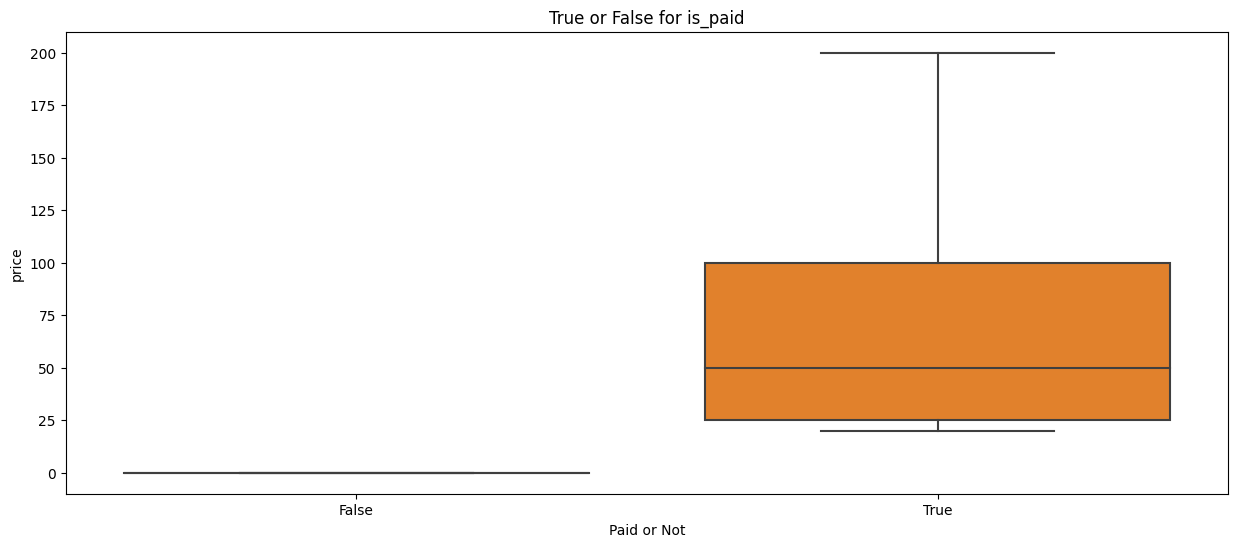

In [123]:
plt.figure(figsize=(15,6))
sns.boxplot(x='is_paid',y='price',data=df)
plt.title('True or False for is_paid')
plt.ylabel('price')
plt.xlabel('Paid or Not')
plt.show()

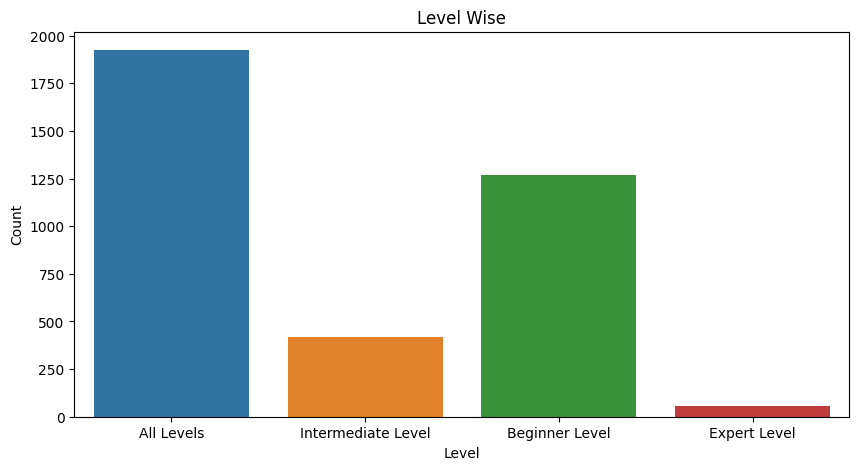

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(x='level',data=df)
plt.title('Level Wise')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

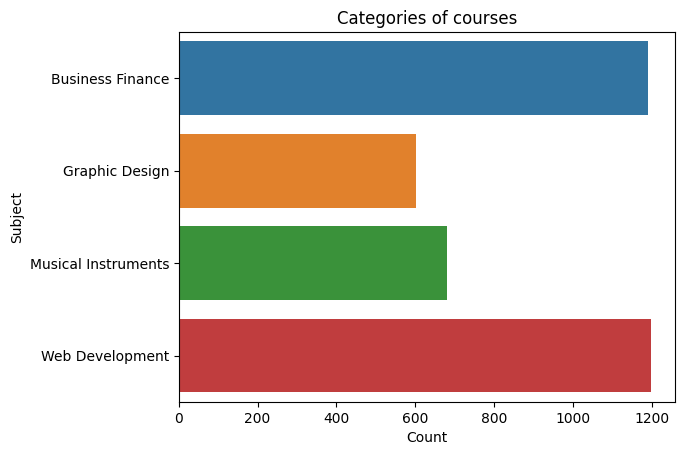

In [129]:
sns.countplot(y='subject',data=df)
plt.title('Categories of courses')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()